## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  42.347880   350.735122  0.134065  8.954198  0.867928
1  58.397765   574.767996  0.792332  4.412165  1.376890
2  20.002430  1175.600174  0.230945  6.307830  1.520085
3  51.843723   967.044761  0.085218  7.752344  0.947572
4  80.346184  1230.084108  0.701230  4.610107  1.554892


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9728695	total: 58ms	remaining: 57.9s
1:	learn: 0.9614967	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9505081	total: 59ms	remaining: 19.6s
3:	learn: 0.9409652	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9330322	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9223067	total: 60.5ms	remaining: 10s
6:	learn: 0.9124830	total: 61ms	remaining: 8.66s
7:	learn: 0.9032891	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8937062	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8863123	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8774157	total: 63ms	remaining: 5.67s
11:	learn: 0.8676234	total: 63.6ms	remaining: 5.23s
12:	learn: 0.8578963	total: 64ms	remaining: 4.86s
13:	learn: 0.8509579	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8421635	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8351513	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8271201	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8199737	total: 66.3ms	remaining: 3.62s
18:	learn: 0.8132179	total: 66.7ms	remaining: 3.44s
19:	l

111:	learn: 0.3789125	total: 106ms	remaining: 841ms
112:	learn: 0.3773636	total: 107ms	remaining: 837ms
113:	learn: 0.3750732	total: 107ms	remaining: 833ms
114:	learn: 0.3725558	total: 108ms	remaining: 828ms
115:	learn: 0.3698661	total: 108ms	remaining: 823ms
116:	learn: 0.3671639	total: 108ms	remaining: 818ms
117:	learn: 0.3652919	total: 109ms	remaining: 814ms
118:	learn: 0.3624159	total: 109ms	remaining: 810ms
119:	learn: 0.3599905	total: 110ms	remaining: 806ms
120:	learn: 0.3579481	total: 110ms	remaining: 802ms
121:	learn: 0.3556085	total: 111ms	remaining: 798ms
122:	learn: 0.3537185	total: 111ms	remaining: 795ms
123:	learn: 0.3516165	total: 112ms	remaining: 790ms
124:	learn: 0.3487884	total: 112ms	remaining: 787ms
125:	learn: 0.3463985	total: 113ms	remaining: 783ms
126:	learn: 0.3440895	total: 113ms	remaining: 778ms
127:	learn: 0.3417749	total: 114ms	remaining: 774ms
128:	learn: 0.3391061	total: 114ms	remaining: 771ms
129:	learn: 0.3370189	total: 115ms	remaining: 767ms
130:	learn: 

288:	learn: 0.1547441	total: 186ms	remaining: 457ms
289:	learn: 0.1541832	total: 186ms	remaining: 456ms
290:	learn: 0.1534829	total: 187ms	remaining: 455ms
291:	learn: 0.1528428	total: 187ms	remaining: 454ms
292:	learn: 0.1520422	total: 188ms	remaining: 453ms
293:	learn: 0.1512457	total: 188ms	remaining: 452ms
294:	learn: 0.1507309	total: 188ms	remaining: 450ms
295:	learn: 0.1502240	total: 189ms	remaining: 449ms
296:	learn: 0.1497616	total: 189ms	remaining: 448ms
297:	learn: 0.1493594	total: 190ms	remaining: 447ms
298:	learn: 0.1487422	total: 190ms	remaining: 445ms
299:	learn: 0.1483008	total: 190ms	remaining: 444ms
300:	learn: 0.1476797	total: 191ms	remaining: 443ms
301:	learn: 0.1471541	total: 191ms	remaining: 441ms
302:	learn: 0.1464715	total: 191ms	remaining: 440ms
303:	learn: 0.1458259	total: 192ms	remaining: 439ms
304:	learn: 0.1452776	total: 192ms	remaining: 438ms
305:	learn: 0.1446767	total: 193ms	remaining: 437ms
306:	learn: 0.1440069	total: 193ms	remaining: 436ms
307:	learn: 

521:	learn: 0.0712291	total: 288ms	remaining: 263ms
522:	learn: 0.0710424	total: 288ms	remaining: 263ms
523:	learn: 0.0710023	total: 289ms	remaining: 262ms
524:	learn: 0.0706629	total: 289ms	remaining: 262ms
525:	learn: 0.0702772	total: 290ms	remaining: 261ms
526:	learn: 0.0701962	total: 290ms	remaining: 260ms
527:	learn: 0.0701161	total: 291ms	remaining: 260ms
528:	learn: 0.0700370	total: 291ms	remaining: 259ms
529:	learn: 0.0699977	total: 291ms	remaining: 258ms
530:	learn: 0.0696678	total: 292ms	remaining: 258ms
531:	learn: 0.0695896	total: 292ms	remaining: 257ms
532:	learn: 0.0695123	total: 293ms	remaining: 257ms
533:	learn: 0.0693340	total: 293ms	remaining: 256ms
534:	learn: 0.0692953	total: 294ms	remaining: 255ms
535:	learn: 0.0688995	total: 294ms	remaining: 255ms
536:	learn: 0.0687086	total: 295ms	remaining: 254ms
537:	learn: 0.0685211	total: 295ms	remaining: 253ms
538:	learn: 0.0683369	total: 295ms	remaining: 253ms
539:	learn: 0.0680271	total: 296ms	remaining: 252ms
540:	learn: 

708:	learn: 0.0421429	total: 367ms	remaining: 151ms
709:	learn: 0.0420850	total: 368ms	remaining: 150ms
710:	learn: 0.0419004	total: 368ms	remaining: 150ms
711:	learn: 0.0418432	total: 368ms	remaining: 149ms
712:	learn: 0.0417599	total: 369ms	remaining: 148ms
713:	learn: 0.0416732	total: 369ms	remaining: 148ms
714:	learn: 0.0415249	total: 370ms	remaining: 147ms
715:	learn: 0.0414442	total: 370ms	remaining: 147ms
716:	learn: 0.0414145	total: 370ms	remaining: 146ms
717:	learn: 0.0413470	total: 371ms	remaining: 146ms
718:	learn: 0.0412460	total: 371ms	remaining: 145ms
719:	learn: 0.0411899	total: 372ms	remaining: 145ms
720:	learn: 0.0410189	total: 372ms	remaining: 144ms
721:	learn: 0.0409635	total: 373ms	remaining: 143ms
722:	learn: 0.0408798	total: 373ms	remaining: 143ms
723:	learn: 0.0408509	total: 374ms	remaining: 142ms
724:	learn: 0.0408224	total: 374ms	remaining: 142ms
725:	learn: 0.0406462	total: 374ms	remaining: 141ms
726:	learn: 0.0405694	total: 375ms	remaining: 141ms
727:	learn: 

937:	learn: 0.0257830	total: 469ms	remaining: 31ms
938:	learn: 0.0257110	total: 469ms	remaining: 30.5ms
939:	learn: 0.0256930	total: 470ms	remaining: 30ms
940:	learn: 0.0256751	total: 470ms	remaining: 29.5ms
941:	learn: 0.0255696	total: 470ms	remaining: 29ms
942:	learn: 0.0255217	total: 471ms	remaining: 28.5ms
943:	learn: 0.0254580	total: 471ms	remaining: 27.9ms
944:	learn: 0.0254112	total: 472ms	remaining: 27.4ms
945:	learn: 0.0253530	total: 472ms	remaining: 26.9ms
946:	learn: 0.0252836	total: 472ms	remaining: 26.4ms
947:	learn: 0.0252664	total: 473ms	remaining: 25.9ms
948:	learn: 0.0251924	total: 473ms	remaining: 25.4ms
949:	learn: 0.0251754	total: 474ms	remaining: 24.9ms
950:	learn: 0.0251305	total: 474ms	remaining: 24.4ms
951:	learn: 0.0250779	total: 474ms	remaining: 23.9ms
952:	learn: 0.0250155	total: 475ms	remaining: 23.4ms
953:	learn: 0.0249988	total: 475ms	remaining: 22.9ms
954:	learn: 0.0249187	total: 476ms	remaining: 22.4ms
955:	learn: 0.0248673	total: 476ms	remaining: 21.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

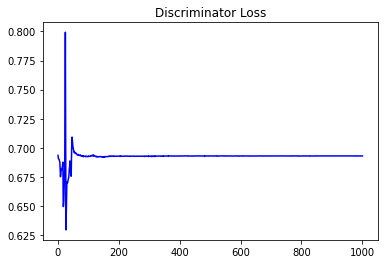

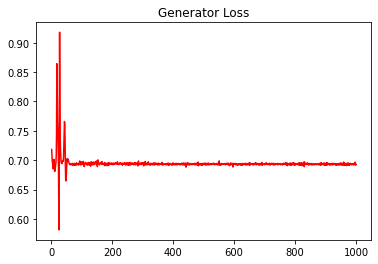

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2168423266280161


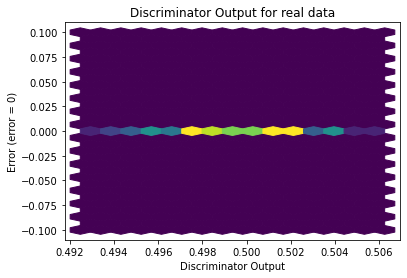

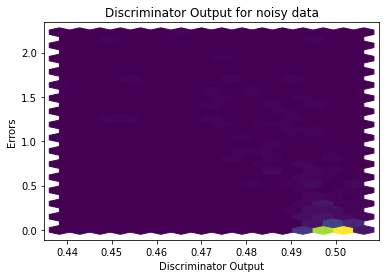

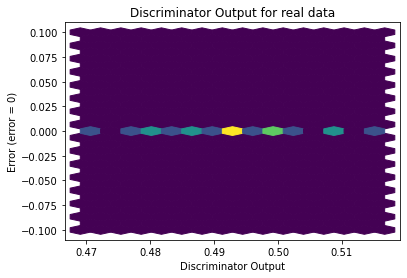

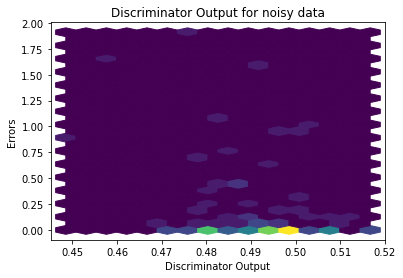

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


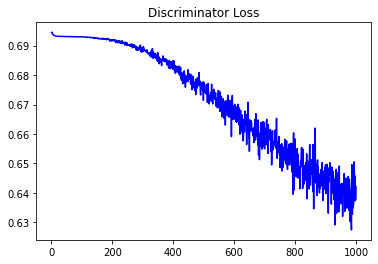

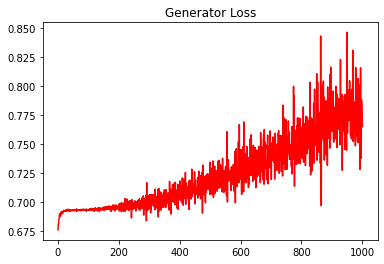

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.234280695860759


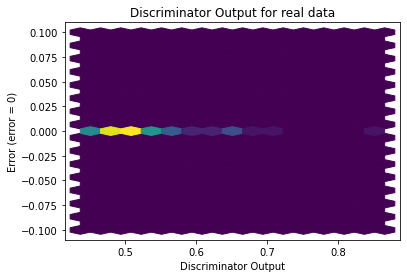

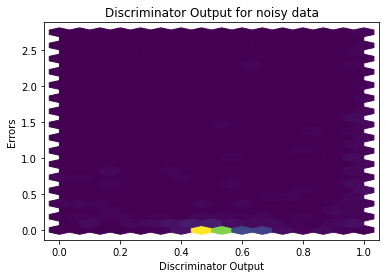

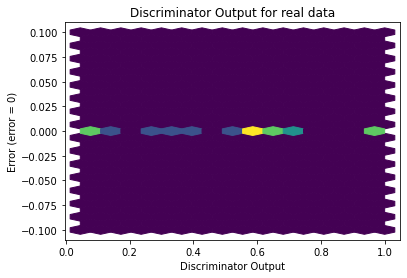

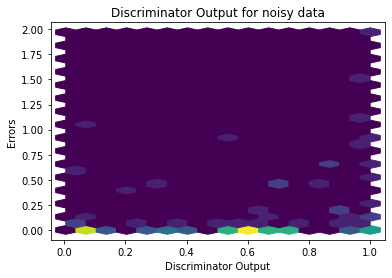

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
